In [180]:
import pandas as pd
import numpy as np
import re
import geopandas as gpd
import os
import folium
from folium.features import CustomIcon
import json
from haversine import haversine
from selenium import webdriver
from PIL import Image

In [107]:
gwangjin = gpd.read_file("/석사과정/3학기/광진구_집계구_2023.shp", encoding = "CP949")
gwangjin

,ADM_CD,TOT_REG_CD,ADM_NM,geometry
0,11050620,11050620010605,구의3동,"POLYGON ((127.09753 37.53723, 127.09737 37.537..."
1,11050630,11050630030803,광장동,"POLYGON ((127.09842 37.54303, 127.09842 37.542..."
2,11050630,11050630040303,광장동,"POLYGON ((127.09835 37.53925, 127.09834 37.539..."
3,11050620,11050620010604,구의3동,"POLYGON ((127.09931 37.53851, 127.09937 37.538..."
4,11050600,11050600010201,구의1동,"POLYGON ((127.08107 37.54508, 127.08154 37.545..."
...,...,...,...,...
643,11050670,11050670011001,자양4동,"POLYGON ((127.06912 37.53676, 127.06912 37.536..."
644,11050530,11050530010010,화양동,"POLYGON ((127.07660 37.54521, 127.07662 37.545..."
645,11050630,11050630040102,광장동,"POLYGON ((127.09985 37.54164, 127.09977 37.541..."
646,11050630,11050630030501,광장동,"POLYGON ((127.09595 37.54205, 127.09601 37.541..."


In [108]:
guui = gwangjin[gwangjin['ADM_NM']=='구의1동']
guui.reset_index(inplace=True, drop=True)
gunja = gwangjin[gwangjin['ADM_NM']=='군자동']
gunja.reset_index(inplace=True, drop=True)
junggok = gwangjin[gwangjin['ADM_NM']=='중곡1동']
junggok.reset_index(inplace=True, drop=True)
neung = gwangjin[gwangjin['ADM_NM']=='능동']
neung.reset_index(inplace=True, drop=True)

In [109]:
neung

,ADM_CD,TOT_REG_CD,ADM_NM,geometry
0,11050590,11050590010002,능동,"POLYGON ((127.08170 37.55564, 127.08210 37.555..."
1,11050590,11050590010005,능동,"POLYGON ((127.08658 37.55356, 127.08627 37.553..."
2,11050590,11050590010011,능동,"POLYGON ((127.08173 37.55263, 127.08168 37.552..."
3,11050590,11050590010010,능동,"POLYGON ((127.08036 37.55380, 127.08034 37.553..."
4,11050590,11050590010013,능동,"POLYGON ((127.08487 37.55339, 127.08476 37.553..."
5,11050590,11050590010012,능동,"POLYGON ((127.08554 37.55234, 127.08532 37.551..."
6,11050590,11050590010015,능동,"POLYGON ((127.08931 37.55262, 127.08949 37.552..."
7,11050590,11050590010014,능동,"POLYGON ((127.07922 37.55464, 127.07918 37.554..."
8,11050590,11050590010017,능동,"POLYGON ((127.08341 37.55362, 127.08338 37.553..."
9,11050590,11050590010004,능동,"POLYGON ((127.08274 37.55590, 127.08284 37.555..."


In [110]:
gu_mart = pd.read_csv("구의1동_마트.csv", encoding = 'euc-kr')
gu_mart # 경도 long, 위도 lat

,가게명,주소,경도,위도
0,GS더프레시 광진구의점,서울 광진구 자양로 168 광진더프레236,127.084528,37.542604
1,하모니마트 구의점,서울 광진구 자양로18길 33,127.085374,37.538052
2,하이웨이마트 구의점,서울 광진구 광나루로 516 하이웨이마트,127.086782,37.544786


In [111]:
junggok_mart = pd.read_csv("중곡1동_마트.csv", encoding = 'euc-kr')
junggok_mart

,가게명,주소,경도,위도
0,행복마트,서울 광진구 능동로43길 11,127.080094,37.560007
1,온누리할인마트,서울 광진구 동일로68길 27,127.077412,37.562557
2,그린팜마트,서울 광진구 천호대로 525,127.076996,37.558575
3,하모니마트 군자역점,서울 광진구 긴고랑로14길 63 삼보글로벌아파트 상가 1층,127.082074,37.563139
4,두리마트,서울 광진구 면목로 126 중곡동주차빌딩,127.080646,37.564386
5,이마트에브리데이 중곡동점,서울 광진구 긴고랑로11길 11,127.081371,37.563818
6,대원할인마트,서울 광진구 면목로 127,127.080240,37.565152


In [112]:
neung_mart = pd.read_csv("능동_마트.csv", encoding = 'utf-8')
neung_mart

,가게명,주소,경도,위도
0,니들가게 코사마트 싱싱마트점,서울 광진구 능동로36길 40,127.081214,37.555532
1,능동할인마트,서울 광진구 자양로 227,127.081188,37.554909
2,애플마트,서울 광진구 군자로 145,127.075215,37.554474
3,홈플익스프레스,서울 광진구 용마산로 10 대붕빌딩,127.088848,37.554510


In [113]:
gunja_mart = pd.read_csv("군자동_마트.csv", encoding = 'utf-8')
gunja_mart

,가게명,주소,경도,위도
0,그린팜마트 군자점,서울 광진구 천호대로 525,127.076957,37.558568
1,알뜰할인마트,광진구 군자로 183,127.078233,37.557013
2,파라곤마트,서울특별시 광진구 광나루로 361,127.069726,37.548475
3,마트픽,대한민국 서울특별시 광진구 동일로 268,127.071712,37.555305
4,나들가게 어머니구판장,서울 광진구 군자로 163,127.076853,37.555418
5,세종홈마트,서울특별시 광진구 군자로 108,127.072081,37.552587
6,군자세계로마트,서울 광진구 군자로 75,127.070636,37.549949
7,현대마트,서울 광진구 동일로 282,127.072344,37.556403
8,양평마트,서울 광진구 동일로36길 23,127.070050,37.551299
9,애플마트,서울 광진구 군자로 145,127.075317,37.554550


In [114]:
def mclp(dong, mart, num_place):
    # 미터 단위로 위도, 경도를 기준으로 거리 계산
    def calculate_distance(coord1, coord2):
        return haversine(coord1, coord2, unit='m')

    # 집계구의 중심점으로 위도, 경도 구하기
    dong_centroids = dong.geometry.centroid
    dong_latlon = [(point.y, point.x) for point in dong_centroids]

    # mart의 가게들의 위도, 경도로 좌표 계산
    mart_latlon = [(lat, lon) for lat, lon in zip(mart['위도'], mart['경도'])]

    # MCLP 
    selected_places = []  

    for _ in range(num_place):
        # 거리를 최대화하는 집계구 선택(ai*yi 최대화)
        max_distance = 0
        best_dong_idx = None
        for i, dong_coord in enumerate(dong_latlon):
            if all(calculate_distance(dong_coord, mart_coord) >= 200 for mart_coord in mart_latlon):
                # 모든 마트와의 거리가 200m 이상인 집계구 선택(yi = 1인 것 선택)
                min_distance_to_mart = min(calculate_distance(dong_coord, mart_coord) for mart_coord in mart_latlon)
                if min_distance_to_mart > max_distance:
                    max_distance = min_distance_to_mart
                    best_dong_idx = i

        # 선택된 수요지와의 거리를 갱신하여 다음 공유 냉장고 위치 선정에 반영
        if best_dong_idx is not None:
            mart_latlon.append(dong_latlon[best_dong_idx])
            selected_places.append(best_dong_idx)

    # 선택된 공유 냉장고의 위치 반환
    return selected_places

In [128]:
selected_places_guui = mclp(guui, gu_mart, num_place = 4)
selected_places_guui

C:\Users\mink5\AppData\Local\Temp\ipykernel_25204\2045832650.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dong_centroids = dong.geometry.centroid


[15, 1, 27, 33]

In [123]:
selected_places_gunja = mclp(gunja, gunja_mart, num_place = 4)
selected_places_gunja

C:\Users\mink5\AppData\Local\Temp\ipykernel_25204\2045832650.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dong_centroids = dong.geometry.centroid


[34, 26]

In [117]:
selected_places_junggok = mclp(junggok, junggok_mart, num_place = 4)
selected_places_junggok

C:\Users\mink5\AppData\Local\Temp\ipykernel_25204\2045832650.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dong_centroids = dong.geometry.centroid


[21, 17]

In [118]:
selected_places_neung = mclp(neung, neung_mart, num_place = 4)
selected_places_neung

C:\Users\mink5\AppData\Local\Temp\ipykernel_25204\2045832650.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dong_centroids = dong.geometry.centroid


[10, 5, 12, 6]

In [88]:
def final_map(dong, mart, selected_places):
    final_selection = dong.iloc[selected_places]['geometry'].to_json() # 입지를 json으로 변경
    center = [dong['geometry'].centroid.y.mean(), dong['geometry'].centroid.x.mean()]

    map_geo = folium.Map(location=center, zoom_start=20)

    def style_function(feature):
        return {
            'fillColor': 'white',  
            'color': 'orange',     
            'weight': 3,            
        }

    folium.GeoJson(dong, style_function=style_function).add_to(map_geo)
    for i in range(mart.shape[0]):
        folium.Marker(
            [mart['위도'][i], mart['경도'][i]], 
            icon=folium.Icon(color='red', icon="fa fa-shopping-cart", prefix='fa-solid')
        ).add_to(map_geo)

        folium.Circle(
            [mart['위도'][i], mart['경도'][i]],
            radius=100,
            color='red',
            fill_color='red'
        ).add_to(map_geo)

    # 공유 냉장고 위치 표시
    folium.GeoJson(final_selection, style_function=lambda x: {'fillColor': 'pink', 'color': 'hotpink',
                                                              'weight': 5
                                                             }).add_to(map_geo)
    icon_path = '냉장고.png' 

    for idx in selected_places:
        centroid = dong.iloc[idx]['geometry'].centroid
        folium.Marker(
            location=[centroid.y, centroid.x],
            icon=CustomIcon(icon_image=icon_path, icon_size=(40, 40))
        ).add_to(map_geo)

    return map_geo

C:\Users\mink5\AppData\Local\Temp\ipykernel_25204\2238495715.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = [dong['geometry'].centroid.y.mean(), dong['geometry'].centroid.x.mean()]



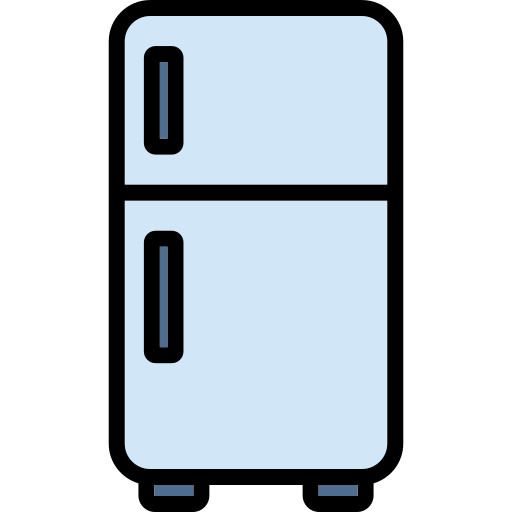
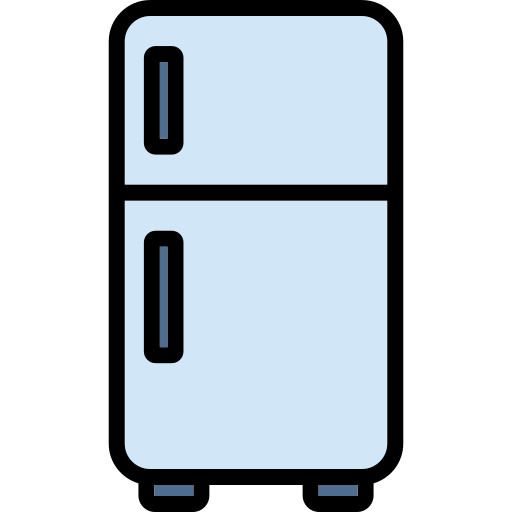
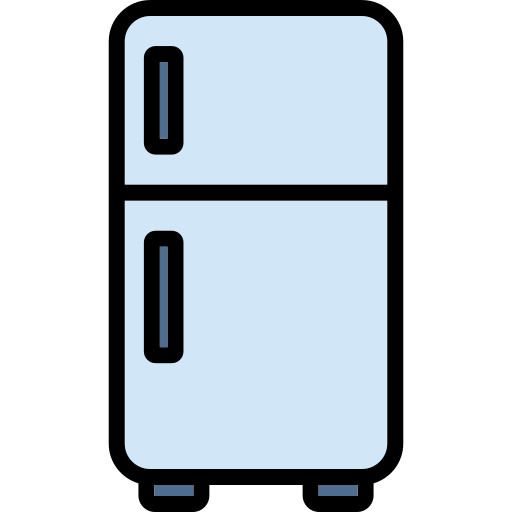
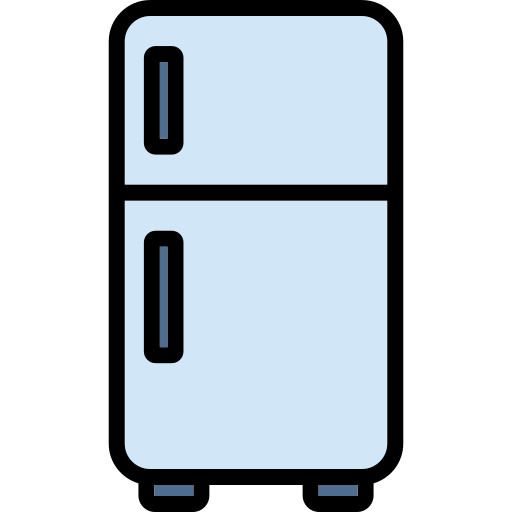

In [64]:
guui_map = final_map(guui, gu_mart, selected_places_guui)
guui_map

C:\Users\mink5\AppData\Local\Temp\ipykernel_25204\2238495715.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = [dong['geometry'].centroid.y.mean(), dong['geometry'].centroid.x.mean()]



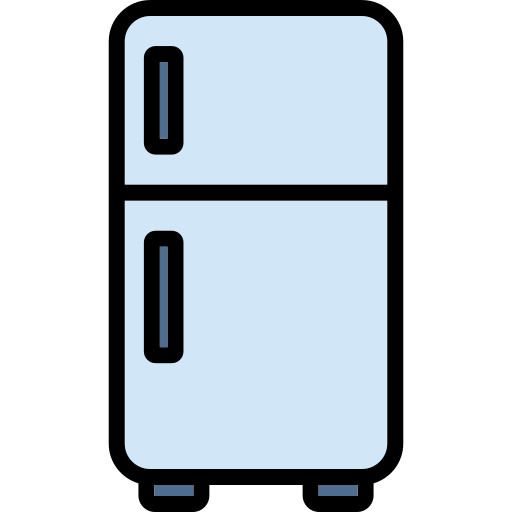
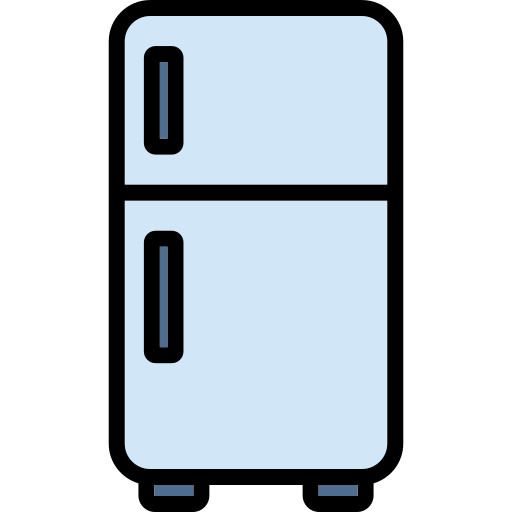

In [65]:
gunja_map = final_map(gunja, gunja_mart, selected_places_gunja)
gunja_map

C:\Users\mink5\AppData\Local\Temp\ipykernel_25204\2238495715.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = [dong['geometry'].centroid.y.mean(), dong['geometry'].centroid.x.mean()]



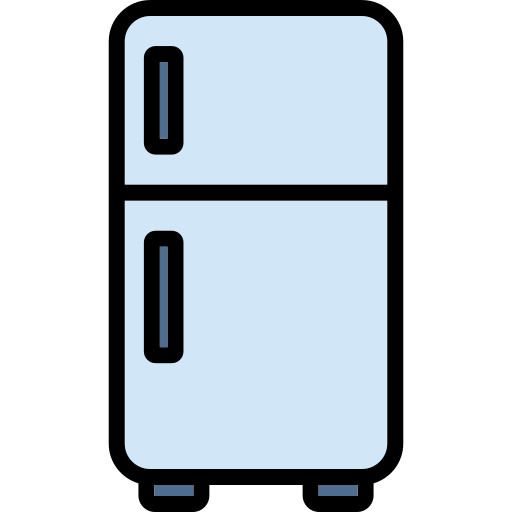
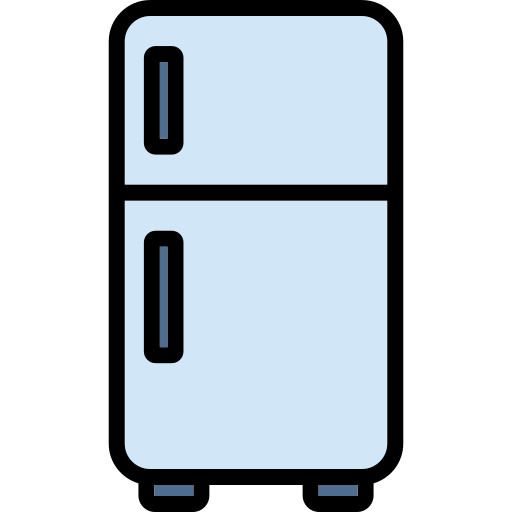

In [89]:
junggok_map = final_map(junggok, junggok_mart, selected_places_junggok)
junggok_map

C:\Users\mink5\AppData\Local\Temp\ipykernel_25204\2238495715.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = [dong['geometry'].centroid.y.mean(), dong['geometry'].centroid.x.mean()]



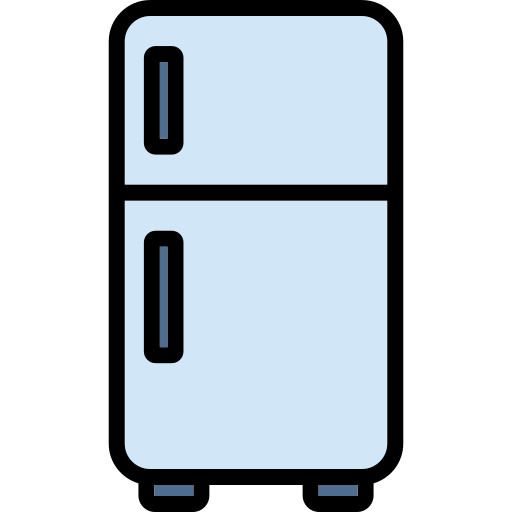
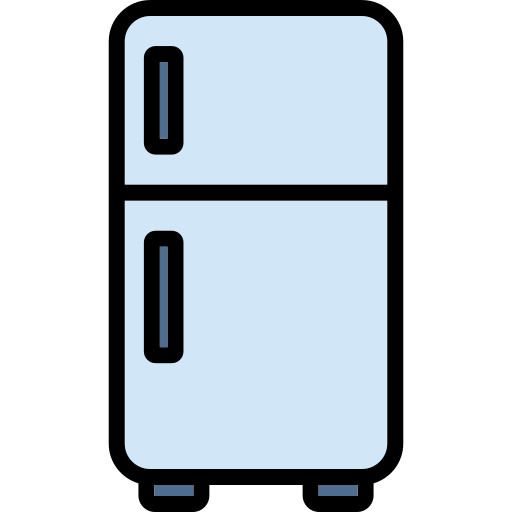
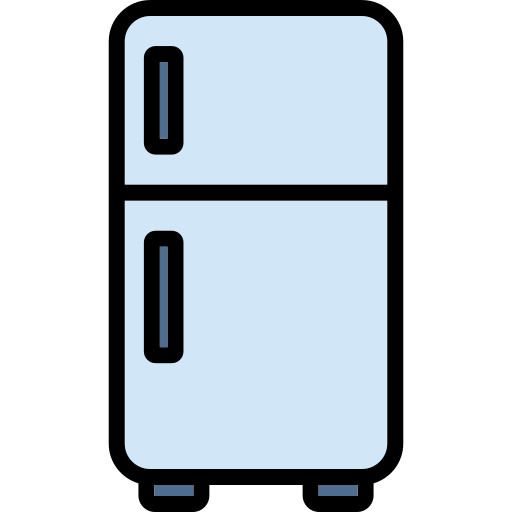
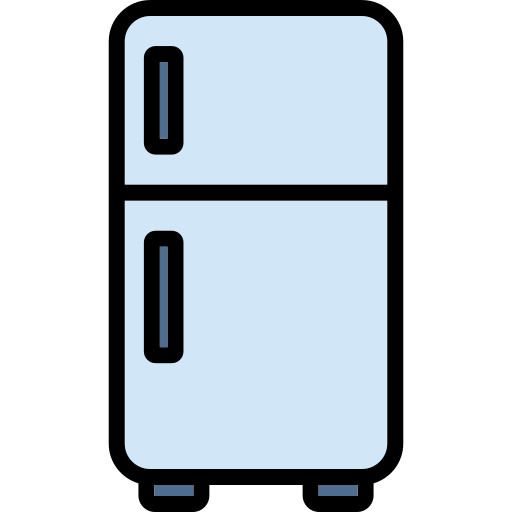

In [67]:
neung_map = final_map(neung, neung_mart, selected_places_neung)
neung_map

In [119]:
gunja[gunja['TOT_REG_CD'] == '11050540010018'].index.to_list()

[14]

In [ ]:
def final_map(dong, mart, selected_places):
    final_selection = dong.iloc[selected_places]['geometry'].to_json() # 입지를 json으로 변경
    center = [dong['geometry'].centroid.y.mean(), dong['geometry'].centroid.x.mean()]

    map_geo = folium.Map(location=center, zoom_start=20)

    def style_function(feature):
        return {
            'fillColor': 'white',  
            'color': 'orange',     
            'weight': 3,            
        }

    folium.GeoJson(dong, style_function=style_function).add_to(map_geo)
    for i in range(mart.shape[0]):
        folium.Marker(
            [mart['위도'][i], mart['경도'][i]], 
            icon=folium.Icon(color='red', icon="fa fa-shopping-cart", prefix='fa-solid')
        ).add_to(map_geo)

        folium.Circle(
            [mart['위도'][i], mart['경도'][i]],
            radius=100,
            color='red',
            fill_color='red'
        ).add_to(map_geo)

    # 공유 냉장고 위치 표시
    folium.GeoJson(final_selection, style_function=lambda x: {'fillColor': 'pink', 'color': 'hotpink',
                                                              'weight': 5
                                                             }).add_to(map_geo)
    icon_path = '냉장고.png' 

    for idx in selected_places:
        centroid = dong.iloc[idx]['geometry'].centroid
        folium.Marker(
            location=[centroid.y, centroid.x],
            icon=CustomIcon(icon_image=icon_path, icon_size=(40, 40))
        ).add_to(map_geo)

    return map_geo

## 구의1동 최종 입지

C:\Users\mink5\AppData\Local\Temp\ipykernel_25204\2238495715.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = [dong['geometry'].centroid.y.mean(), dong['geometry'].centroid.x.mean()]



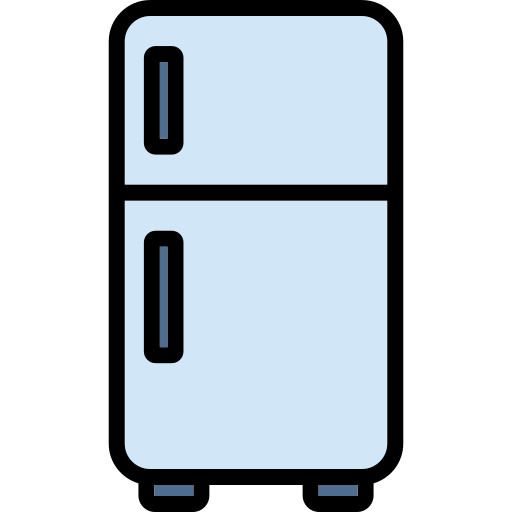
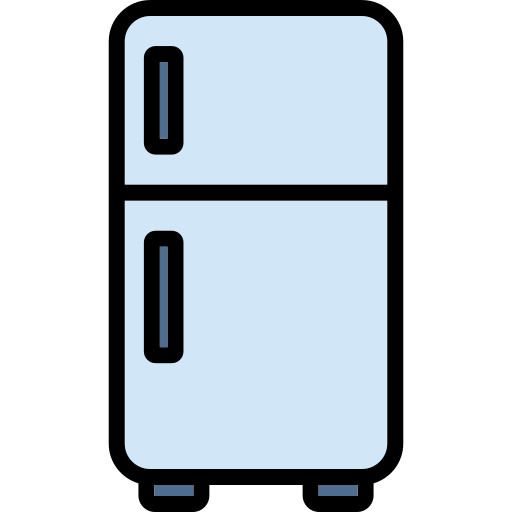
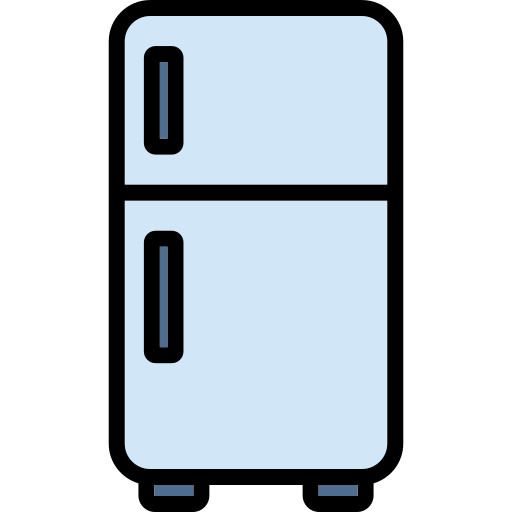

In [179]:
guui_select = [15, 11, 32]
final_map(guui, gu_mart, guui_select)

In [187]:
guui_map = final_map(guui, gu_mart, guui_select)
guui_map.save('guui_map.html')
gunja_map = final_map(gunja, gunja_mart, gunja_select)
gunja_map.save('gunja_map.html')
junggok_map = final_map(junggok, junggok_mart, junggok_select)
junggok_map.save('junggok.html')
neung_map = final_map(neung, neung_mart, neung_select)
neung_map.save('neung.html')

C:\Users\mink5\AppData\Local\Temp\ipykernel_25204\2238495715.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = [dong['geometry'].centroid.y.mean(), dong['geometry'].centroid.x.mean()]
C:\Users\mink5\AppData\Local\Temp\ipykernel_25204\2238495715.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = [dong['geometry'].centroid.y.mean(), dong['geometry'].centroid.x.mean()]
C:\Users\mink5\AppData\Local\Temp\ipykernel_25204\2238495715.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = [dong['geometry'].centroid.y.mean(), dong['geometry'].centroid.x.

## 군자동 최종 입지

In [122]:
# 지현 지정 집계구
gunja[gunja['TOT_REG_CD'] == '11050540010018'].index.to_list() # 14
gunja_select = [14, 26]

[14]

C:\Users\mink5\AppData\Local\Temp\ipykernel_25204\2238495715.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = [dong['geometry'].centroid.y.mean(), dong['geometry'].centroid.x.mean()]



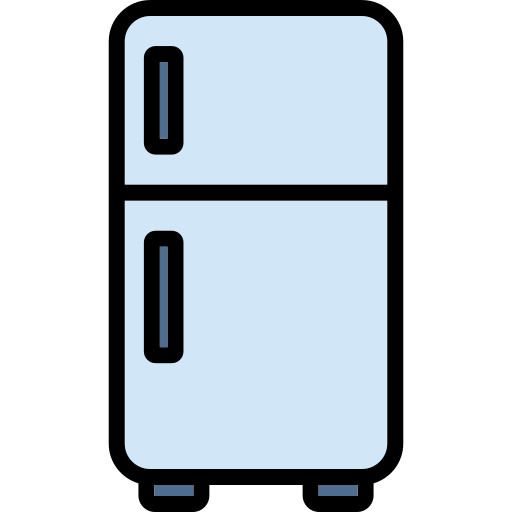
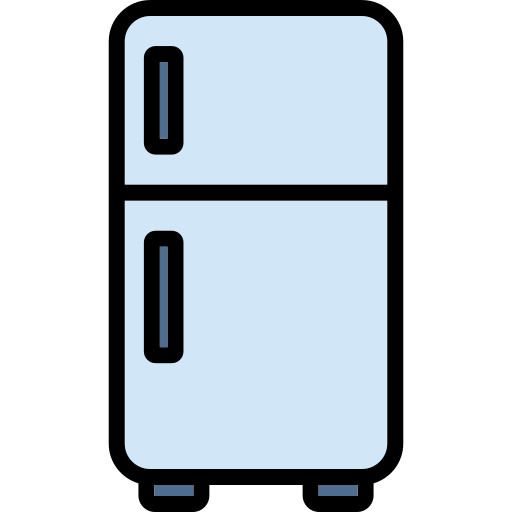

In [127]:
final_map(gunja, gunja_mart, gunja_select)

## 중곡1동 최종 입지

C:\Users\mink5\AppData\Local\Temp\ipykernel_25204\2238495715.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = [dong['geometry'].centroid.y.mean(), dong['geometry'].centroid.x.mean()]



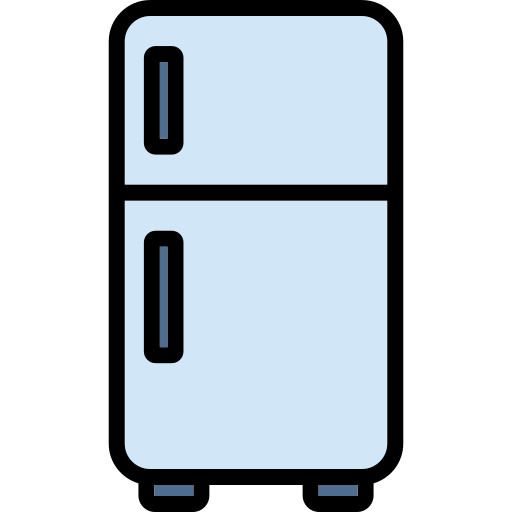
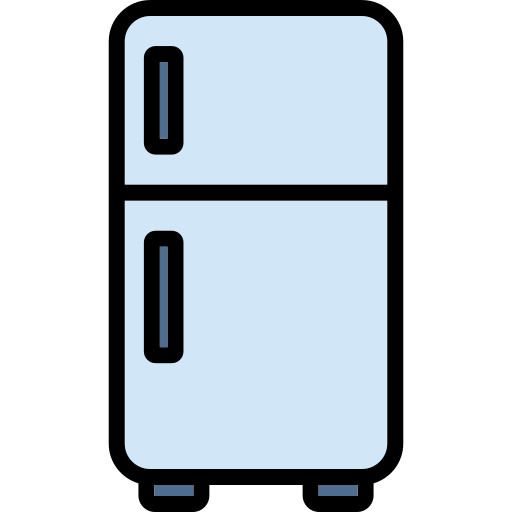

In [156]:
junggok_select = [21, 22]
final_map(junggok, junggok_mart, junggok_select)

## 능동 최종 입지

C:\Users\mink5\AppData\Local\Temp\ipykernel_25204\2238495715.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = [dong['geometry'].centroid.y.mean(), dong['geometry'].centroid.x.mean()]



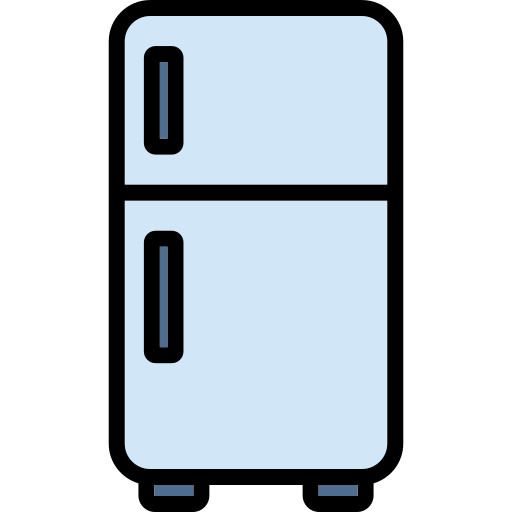
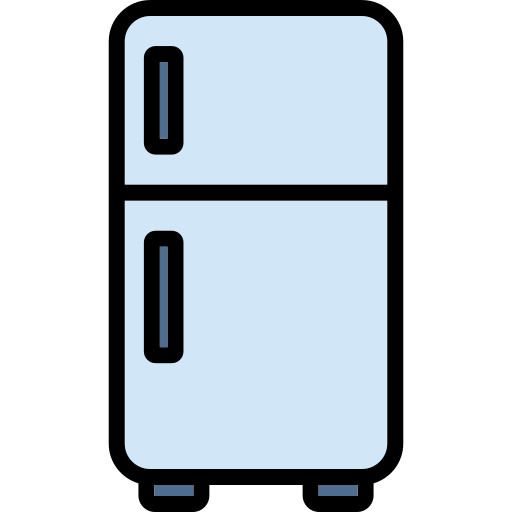

In [158]:
neung_select = [ 5, 12]
final_map(neung, neung_mart, neung_select)